In [1]:
import numpy as np
import pickle
import pandas as pd
from pathlib import Path
import scipy.stats as st
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
train_df = pd.read_csv('music.csv')
train_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,Hip-Hop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,Indie
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,Hip-Hop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,Indie
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,Blues
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,Metal
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,Metal


In [3]:
train_df = train_df.dropna()

In [4]:
bin_df = train_df.copy()

In [5]:
bins = [0, 50, 100]

# Create labels for these bins
group_labels = ["50 or Below", "Above 50"]

In [6]:
bin_df["Pop"] = pd.cut(bin_df["Popularity"], bins, labels=group_labels)
bin_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,genre,Pop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock,Above 50
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,Indie,50 or Below
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock,Above 50
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,Indie,Above 50
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,Blues,50 or Below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,Indie,50 or Below
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,Blues,50 or Below
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,Metal,50 or Below
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,Metal,50 or Below


In [7]:
# Create a GroupBy object based upon "View Group"
test_group = bin_df.groupby("Pop")

# Find how many rows fall into each bin
print(test_group["Pop"].count())

# Get the average of each column within the GroupBy object
test_group.mean()

Pop
50 or Below    8081
Above 50       3732
Name: Pop, dtype: int64


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
Pop,,,,,,,,,,,,,,
50 or Below,34.349709,0.510606,0.663184,5.961886,-8.476019,0.620097,0.071438,0.260531,0.214869,0.202222,0.455982,122.984011,213209.040024,3.898899
Above 50,62.049303,0.555990,0.685723,5.995713,-7.652363,0.632369,0.070390,0.195443,0.101305,0.179666,0.500718,122.808747,212371.969060,3.946141


# Correlations

The correlation coefficient between Humidity(%) and Latitude Linear Regression is -0.13


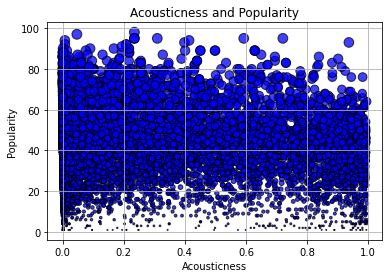

In [8]:
acousticness = bin_df["acousticness"]
popp = bin_df["Popularity"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(popp, acousticness)
py_fit = py_slope * acousticness + py_int

plt.scatter(acousticness,popp, marker="o", facecolors="blue", edgecolors="black",
              s=popp, alpha=0.75)
plt.xlabel("Acousticness")
plt.ylabel("Popularity")
plt.grid(True)
plt.title("Acousticness and Popularity")


print(f"The correlation coefficient between Humidity(%) and Latitude Linear Regression is {round(st.pearsonr(popp, acousticness)[0],2)}")

The correlation coefficient between Humidity(%) and Latitude Linear Regression is 0.14


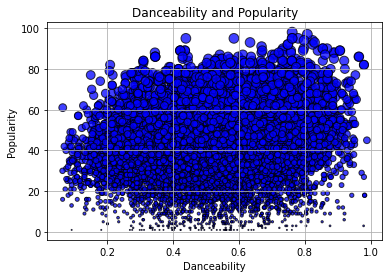

In [9]:
dance = bin_df["danceability"]
popp = bin_df["Popularity"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(popp, dance)
py_fit = py_slope * dance + py_int

plt.scatter(dance,popp, marker="o", facecolors="blue", edgecolors="black",
              s=popp, alpha=0.75)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.grid(True)
plt.title("Danceability and Popularity")

print(f"The correlation coefficient between Humidity(%) and Latitude Linear Regression is {round(st.pearsonr(popp, dance)[0],2)}")

The correlation coefficient between Humidity(%) and Latitude Linear Regression is -0.08


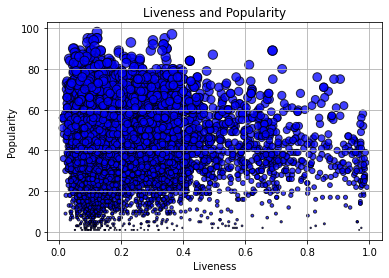

In [10]:
liveness = bin_df["liveness"]
popp = bin_df["Popularity"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(popp, liveness)
py_fit = py_slope * liveness + py_int

plt.scatter(liveness,popp, marker="o", facecolors="blue", edgecolors="black",
              s=popp, alpha=0.75)
plt.xlabel("Liveness")
plt.ylabel("Popularity")
plt.grid(True)
plt.title("Liveness and Popularity")

print(f"The correlation coefficient between Humidity(%) and Latitude Linear Regression is {round(st.pearsonr(popp, liveness)[0],2)}")

The correlation coefficient between Humidity(%) and Latitude Linear Regression is -0.17


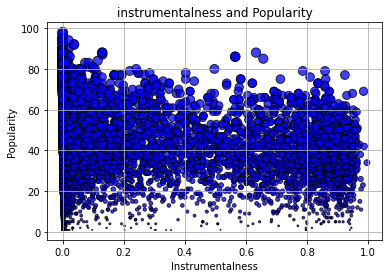

In [11]:
instrumentalness = bin_df["instrumentalness"]
popp = bin_df["Popularity"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(popp, instrumentalness)
py_fit = py_slope * instrumentalness + py_int

plt.scatter(instrumentalness,popp, marker="o", facecolors="blue", edgecolors="black",
              s=popp, alpha=0.75)
plt.xlabel("Instrumentalness")
plt.ylabel("Popularity")
plt.grid(True)
plt.title("instrumentalness and Popularity")

print(f"The correlation coefficient between Humidity(%) and Latitude Linear Regression is {round(st.pearsonr(popp, instrumentalness)[0],2)}")

The correlation coefficient between Humidity(%) and Latitude Linear Regression is 0.06


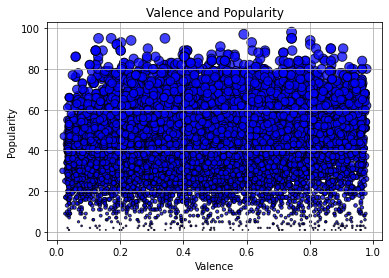

In [12]:
valence = bin_df["valence"]
popp = bin_df["Popularity"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(popp, valence)
py_fit = py_slope * valence + py_int

plt.scatter(valence,popp, marker="o", facecolors="blue", edgecolors="black",
              s=popp, alpha=0.75)
plt.xlabel("Valence")
plt.ylabel("Popularity")
plt.grid(True)
plt.title("Valence and Popularity")

print(f"The correlation coefficient between Humidity(%) and Latitude Linear Regression is {round(st.pearsonr(popp, valence)[0],2)}")

# Model Building

In [13]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()    

In [14]:
test = bin_df.copy()
test.drop("Pop", axis = 1, inplace = True)
test.drop("Artist Name", inplace = True, axis = 1)
test.drop("Track Name", inplace = True, axis = 1)
test.drop("Popularity", inplace = True, axis = 1)
test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,genre
1,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock
2,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,Indie
4,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock
5,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,Indie
6,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,Blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,Indie
17992,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,Blues
17993,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,Metal
17994,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,Metal


In [15]:
y_label = LabelEncoder().fit_transform(bin_df['Pop'])
y_label

array([1, 0, 1, ..., 0, 0, 0])

In [16]:
X = pd.get_dummies(test)
y = y_label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

# Familiar Regressors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression

In [18]:
# test_model(LinearRegression(), data)

test_model(KNeighborsClassifier(), data)
test_model(RandomForestClassifier(), data)
test_model(ExtraTreesClassifier(), data)
test_model(AdaBoostClassifier(), data)
test_model(SVC(C=1.0), data)
test_model(LogisticRegression(), data)

Model: KNeighborsClassifier
Train score: 0.7693870640027091
Test Score: 0.6767095463777928

Model: RandomForestClassifier
Train score: 0.9998871204424878
Test Score: 0.7464454976303317

Model: ExtraTreesClassifier
Train score: 0.9998871204424878
Test Score: 0.7119160460392688

Model: AdaBoostClassifier
Train score: 0.6975956654249915
Test Score: 0.7048070412999323

Model: SVC
Train score: 0.7048199571057682
Test Score: 0.7115775220040623

Model: LogisticRegression
Train score: 0.6843887571960718
Test Score: 0.7085308056872038



# Logistic Regression

In [34]:
classifier = LogisticRegression()
app_test = classifier.fit(X_train_scaled, y_train)

In [20]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6843887571960718
Testing Data Score: 0.7085308056872038


In [21]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
2949,0,1
2950,0,0
2951,0,0
2952,0,1


In [35]:
pickle.dump(app_test, open('app.pkl', "wb"))

# Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[1797,  271],
       [ 782,  104]], dtype=int64)

In [23]:
TP = 729
FP = 192
TN = 1876
FN = 157
accuracy = (TP + TN) / (TP + FP + TN + FN)
print(accuracy)

0.8818551117129316


In [24]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77      2068
           1       0.28      0.12      0.16       886

    accuracy                           0.64      2954
   macro avg       0.49      0.49      0.47      2954
weighted avg       0.57      0.64      0.59      2954



# KNN

k: 1, Train/Test Score: 1.000/0.628
k: 3, Train/Test Score: 0.809/0.661
k: 5, Train/Test Score: 0.769/0.677
k: 7, Train/Test Score: 0.754/0.673
k: 9, Train/Test Score: 0.742/0.682
k: 11, Train/Test Score: 0.733/0.683
k: 13, Train/Test Score: 0.725/0.686
k: 15, Train/Test Score: 0.718/0.685
k: 17, Train/Test Score: 0.712/0.685
k: 19, Train/Test Score: 0.708/0.688


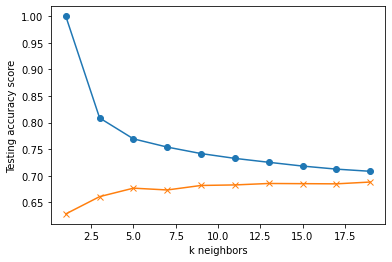

In [25]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [26]:
# Predicting results using Test data set
knn_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(knn_pred,y_test)

0.7000677048070413

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9998871204424878
Testing Score: 0.7505077860528098


[0.08979803 0.08070281 0.04647726 0.0840977  0.01269278 0.08282327
 0.08663072 0.10263225 0.08377105 0.0831107  0.08065852 0.08421609
 0.00724499 0.00239087 0.00482169 0.02151891 0.0047194  0.00500739
 0.00342165 0.00629628 0.00149388 0.00477556 0.00922535 0.01147284]


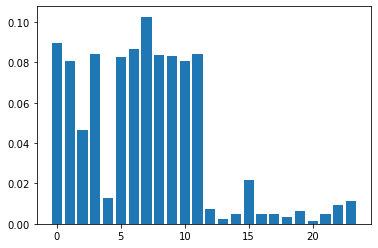

In [28]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [29]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False])

# ROC Curves

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [31]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

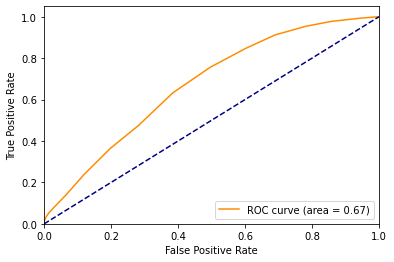

In [32]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")
plt.show()

In [33]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg = reg.fit(X_train_scaled, y_train)
reg.score(X_train_scaled, y_train)

0.9997411616596928

In [39]:
# from sklearn.utils import resample

# regs = []
# scores = []
# for i in range(50):
    
#     # Sample the data for each new tree
#     X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
#     # Create a decision tree and append it to our list of classifiers
#     reg = RandomForestRegressor().fit(X_train_scaled_bootstrap, y_train_bootstrap)
#     regs.append(reg)
    
#     # Take the median score of all the created classifiers
#     y_preds = [reg.predict(X_test_scaled) for reg in regs]
#     y_pred = pd.DataFrame(y_preds).median().round()
#     score = score = accuracy_score(y_test, y_pred)
#     scores.append(score)

# plt.plot(scores)
# plt.show()
# print(f'score: {score}')

In [ ]:
# danceability = bin_df["danceability"]
# energy = bin_df["energy"]
# key = bin_df["key"]
# loudness = bin_df["loudness"]
# mode = bin_df["mode"]
# speechiness = bin_df["speechiness"]
# acousticness = bin_df["acousticness"]
# instrumentalness = bin_df["instrumentalness"]
# liveness = bin_df["liveness"]
# valence = bin_df["valence"]
# tempo = bin_df["tempo"]
# # duration_in min/ms = bin_df["duration_in min/ms"]
# time_signature = bin_df["time_signature"]
# # genre = bin_df["danceability"]


In [ ]:
# data = [danceability, energy, mode,
# speechiness, acousticness, instrumentalness, liveness, valence]

# fig = plt.figure(1, figsize=(15, 10))
# ax = fig.add_subplot(111)
# ax.set_xticklabels(['danceability', 'energy', 'mode', 'speechiness', 'acousticness',
#        'instrumentalness', 'liveness', 'valence'])
# ax.set_ylabel('Popularity)')
# ax.set_xlabel('')
# ax.set_title('')
# box = ax.boxplot(data)

In [ ]:
# drop_df.drop(drop_df.iloc[:, 0:3], inplace = True, axis = 1)
# drop_df

In [ ]:
y_train = train_df["Popularity"]

In [ ]:
X_train_dummies = pd.get_dummies(train_dfx)

In [ ]:
X_train_dummies

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_dummies, y_train, random_state=24)

In [ ]:
# Scale the data
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

In [ ]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predictions = model.predict(X_train_scaled)

# Score the prediction with MSE and R2
mse = mean_squared_error(y_train, predictions)
r2 = r2_score(y_train, predictions)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predictions:\t{list(model.predict(X_test_scaled[:10]))}')

In [ ]:
plt.scatter(predictions, predictions - y_train)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()